<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/neural_network_regression_with_tensorflow_exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Neural network regression with TensorFlow Exercises

In [56]:
# Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

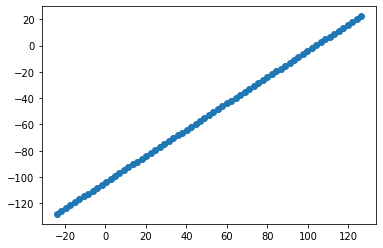

In [10]:
# Creating Features
X = np.arange(-24,128,2.21)

# Creating Labels
y = np.arange(-128,24,2.21)

# Visulizing
plt.scatter(X, y);

In [29]:
# Bulding a model

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 1. Set Random seed
tf.random.set_seed(42)

# 2. Compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 51ms/step


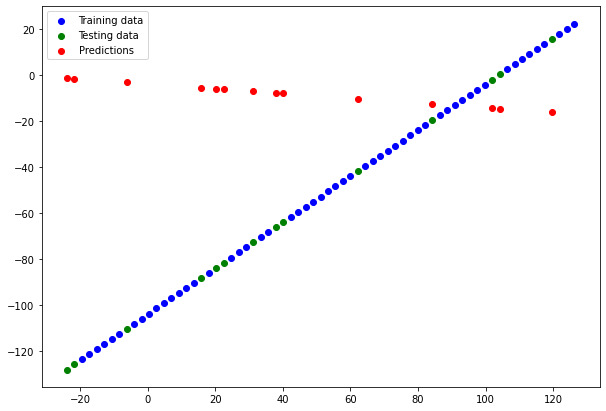

In [30]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
     

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 1000)              2000      
                                                                 
 dense_79 (Dense)            (None, 100)               100100    
                                                                 
 dense_80 (Dense)            (None, 10)                1010      
                                                                 
 dense_81 (Dense)            (None, 1)                 11        
                                                                 
Total params: 103,121
Trainable params: 103,121
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 59ms/step


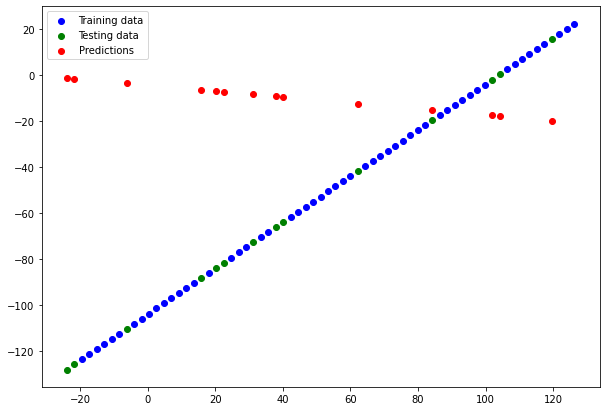

In [43]:
# Creating a model_2

# 1. setting random seeds
tf.random.set_seed(42)

# 2. Creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200, verbose=0)
model_2.summary()
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 10000)             20000     
                                                                 
 dense_96 (Dense)            (None, 1000)              10001000  
                                                                 
 dense_97 (Dense)            (None, 100)               100100    
                                                                 
 dense_98 (Dense)            (None, 10)                1010      
                                                                 
 dense_99 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,122,121
Trainable params: 10,122,121
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s

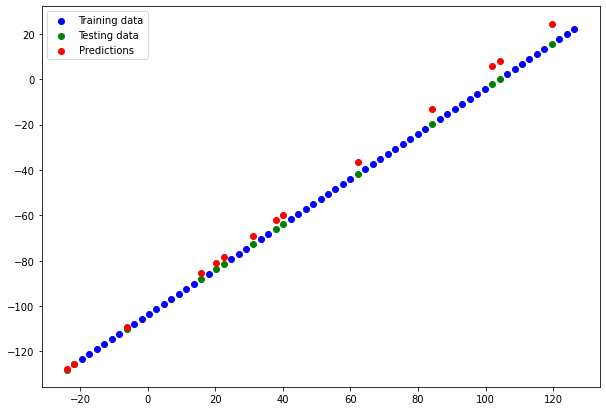

In [47]:
# Creating a model_2

# 1. setting random seeds
tf.random.set_seed(42)

# 2. Creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10000),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=300, verbose=0)
model_2.summary()
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds_2)

4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


In [54]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/boston_housing.csv",header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


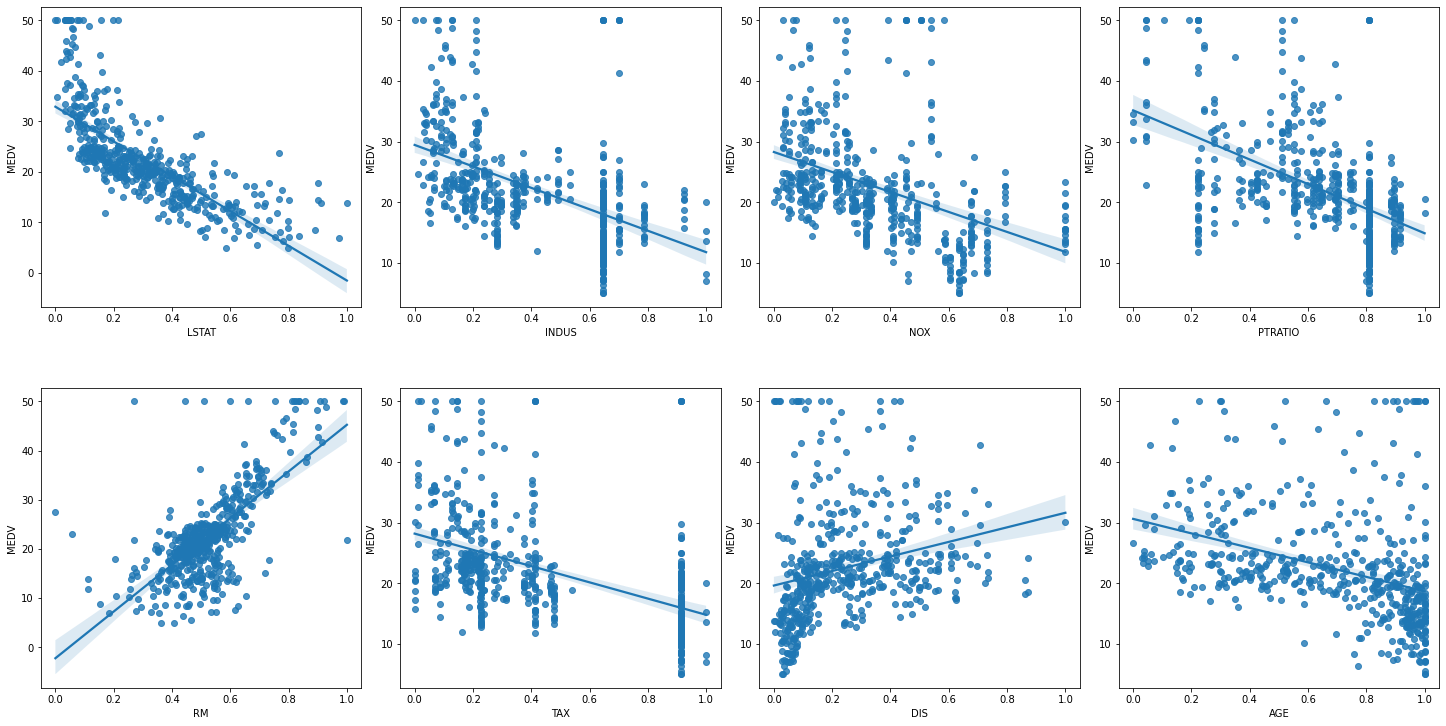

In [57]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)